In [6]:
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

/Users/sdkolak/animAIte/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 16 files: 100%|██████████| 16/16 [00:00<00:00, 6635.90it/s]


In [15]:
prompt = "myself as a girl lifting the corner of the sea"
#images = pipe(prompt, num_inference_steps=2, width=512, height=288)
images = pipe(prompt, num_inference_steps=3, width=512, height=384)

  0%|          | 0/3 [00:00<?, ?it/s]

timestep:  tensor(667)
timestep:  tensor(334)


 33%|███▎      | 1/3 [00:24<00:49, 24.55s/it]

timestep:  tensor(334)


 67%|██████▋   | 2/3 [00:37<00:17, 17.46s/it]

timestep:  tensor(1)


100%|██████████| 3/3 [00:49<00:00, 16.42s/it]


In [5]:
width_base = 16
height_base = 9

for i in range(1, 100):
    pass
    #print('Frame Size', i*width_base, i*height_base)

print(288/8)

36.0


In [13]:
width_base = 4
height_base = 3

for i in range(1, 200):
    print('Frame Size', i*width_base, i*height_base)

Frame Size 4 3
Frame Size 8 6
Frame Size 12 9
Frame Size 16 12
Frame Size 20 15
Frame Size 24 18
Frame Size 28 21
Frame Size 32 24
Frame Size 36 27
Frame Size 40 30
Frame Size 44 33
Frame Size 48 36
Frame Size 52 39
Frame Size 56 42
Frame Size 60 45
Frame Size 64 48
Frame Size 68 51
Frame Size 72 54
Frame Size 76 57
Frame Size 80 60
Frame Size 84 63
Frame Size 88 66
Frame Size 92 69
Frame Size 96 72
Frame Size 100 75
Frame Size 104 78
Frame Size 108 81
Frame Size 112 84
Frame Size 116 87
Frame Size 120 90
Frame Size 124 93
Frame Size 128 96
Frame Size 132 99
Frame Size 136 102
Frame Size 140 105
Frame Size 144 108
Frame Size 148 111
Frame Size 152 114
Frame Size 156 117
Frame Size 160 120
Frame Size 164 123
Frame Size 168 126
Frame Size 172 129
Frame Size 176 132
Frame Size 180 135
Frame Size 184 138
Frame Size 188 141
Frame Size 192 144
Frame Size 196 147
Frame Size 200 150
Frame Size 204 153
Frame Size 208 156
Frame Size 212 159
Frame Size 216 162
Frame Size 220 165
Frame Size 224 16

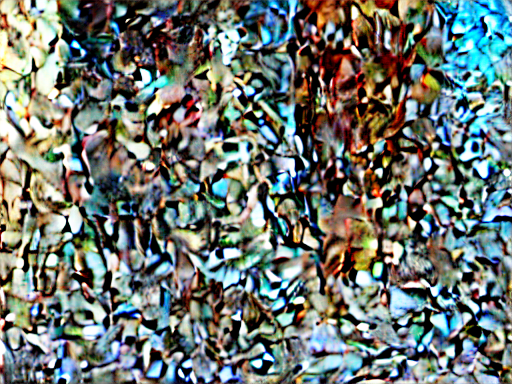

In [16]:
img1 = images[0]
img2 = images[1]
img3 = images[2]
img4 = images[3]

img1[0]

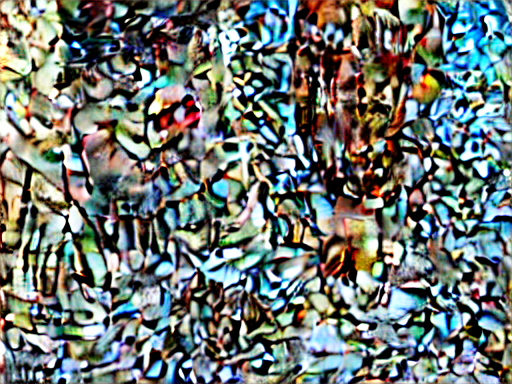

In [17]:
img2[0]

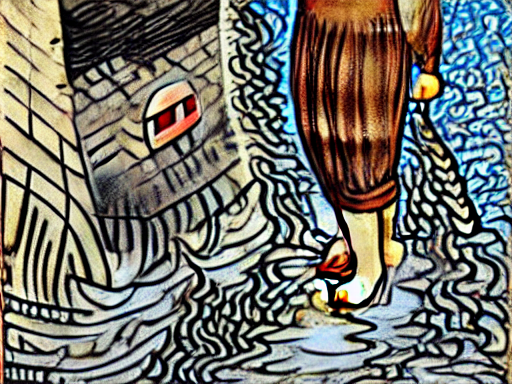

In [18]:
img3[0]

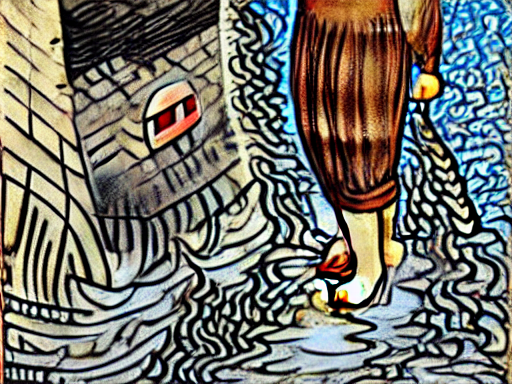

In [19]:
img4[0]